In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Assignment_Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [4]:
columns_to_drop = ['DEALER ID', 'HDB BRANCH NAME', 'APPLICATION LOGIN DATE', 'HDB BRANCH STATE', 'mobile', 'AADHAR VERIFIED', 'MOBILE VERIFICATION', 'DEALER NAME', 'ASSET MODEL NO', 'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'Personal Email Address', 'DOB', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'vpa', 'upi_name', 'Phone Social Premium.a23games', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart', 'Phone Social Premium.microsoft', 'Phone Social Premium.my11', 'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle', 'Phone Social Premium.shaadi', 'Phone Social Premium.skype', 'Phone Social Premium.toi', 'Phone Social Premium.whatsapp', 'Phone Social Premium.yatra', 'Phone Social Premium.zoho']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
# Didn't helped in increasing the prediction accuracy or any other metrics
# branch_name_freq = df['HDB BRANCH NAME'].value_counts()
# branch_name_freq = branch_name_freq / len(df)
# df['HDB BRANCH NAME'] = df['HDB BRANCH NAME'].map(branch_name_freq).fillna(0)

In [6]:
# print(df['HDB BRANCH NAME'].head())

In [7]:
df['Cibil Score'] = pd.to_numeric(df['Cibil Score'], errors='coerce')

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [9]:
le.fit(df['MARITAL STATUS'].dropna())

print(dict(zip(le.classes_, le.transform(le.classes_))))

df['MARITAL STATUS'] = df['MARITAL STATUS'].apply(lambda x: le.transform([x])[0] if pd.notnull(x) else np.nan)

print(df['MARITAL STATUS'].unique())

{'Married': 0, 'Single': 1}
[ 0. nan  1.]


In [10]:
le_gender = LabelEncoder()

df['GENDER'] = le_gender.fit_transform(df['GENDER'])

print(df['GENDER'].unique())

print(dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

[1 0]
{'Female': 0, 'Male': 1}


In [11]:
df = pd.get_dummies(df, columns=['ADDRESS TYPE'], dummy_na=True)

In [12]:
df['EMPLOY CONSTITUTION'] = df['EMPLOY CONSTITUTION'].map({
    'SALARIED': 0,
    'SELF-EMPLOYED': 1
})

In [13]:
df['pan_name_match'] = df.apply(
    lambda row: 1 if pd.isna(row['Pan Name']) or row['Pan Name'] == row['name'] else 0,
    axis=1
)

df = df.drop(columns=['Pan Name', 'name'])

In [14]:
phone_footprint_encoded = pd.get_dummies(df['phone_phoneFootprintStrengthOverall'], dummy_na=True, prefix='phone_footprint')
df = pd.concat([df, phone_footprint_encoded], axis=1)
df = df.drop(columns=['phone_phoneFootprintStrengthOverall'])

In [15]:
label_encoder = LabelEncoder()

df['Application Status'] = label_encoder.fit_transform(df['Application Status'])

In [16]:
one_hot_encoded_df = pd.get_dummies(df['ASSET CTG'], prefix='ASSET_CTG')
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop('ASSET CTG', axis=1, inplace=True)

In [17]:
columns_to_drop = [
    'ASSET_CTG_EMECA', 'ASSET_CTG_ESECB', 'ASSET_CTG_ESNRB', 'ASSET_CTG_ESNRC',
    'ASSET_CTG_MCECA', 'ASSET_CTG_MCECB', 'ASSET_CTG_MCECC', 'ASSET_CTG_MCEXA',
    'ASSET_CTG_MCEXB', 'ASSET_CTG_MCPRA', 'ASSET_CTG_MOECA', 'ASSET_CTG_SCECA',
    'ASSET_CTG_SCEXA', 'phone_footprint_nan', 'ADDRESS TYPE_nan'
]
# columns_to_drop = [
#     'phone_footprint_nan', 'ADDRESS TYPE_nan'
# ]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Application Status'])
y = df['Application Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cibil Score                      5665 non-null   float64
 1   TOTAL ASSET COST                 4892 non-null   float64
 2   APPLIED AMOUNT                   10000 non-null  int64  
 3   MARITAL STATUS                   5106 non-null   float64
 4   GENDER                           10000 non-null  int64  
 5   AGE                              10000 non-null  int64  
 6   EMPLOY CONSTITUTION              5002 non-null   float64
 7   Phone Social Premium.housing     8224 non-null   float64
 8   phone_digitalage                 9996 non-null   float64
 9   phone_nameMatchScore             9996 non-null   float64
 10  ADDRESS TYPE_Company Provided    10000 non-null  bool   
 11  ADDRESS TYPE_OWNDED-FLAT         10000 non-null  bool   
 12  ADDRESS TYPE_OWNED-

In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

catboost_model = CatBoostClassifier(learning_rate=0.101, depth=6, iterations=100, verbose=0)

catboost_model.fit(X_train, y_train)

catboost_predictions = catboost_model.predict(X_test)

catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print(f'CatBoost Accuracy: {catboost_accuracy}')

CatBoost Accuracy: 0.8786666666666667


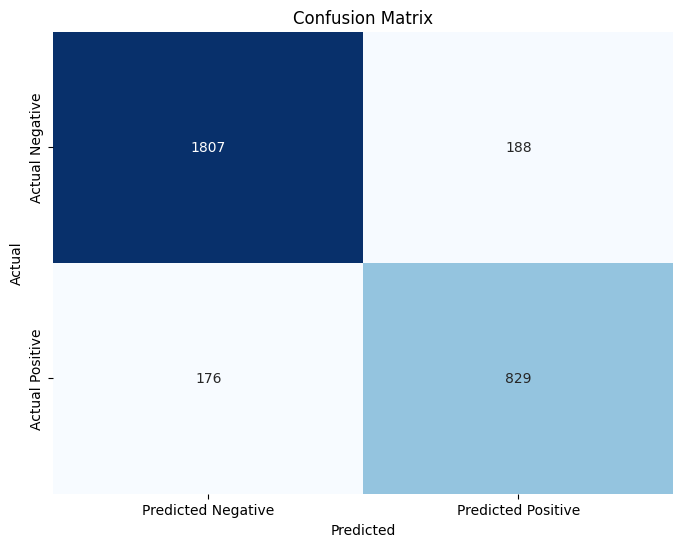

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, catboost_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_test, catboost_predictions)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1995
           1       0.82      0.82      0.82      1005

    accuracy                           0.88      3000
   macro avg       0.86      0.87      0.86      3000
weighted avg       0.88      0.88      0.88      3000



In [24]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, catboost_model.predict_proba(X_test))
print(f'Log Loss: {logloss}')

Log Loss: 0.23803086128888004


ROC AUC Score: 0.9556530630057731


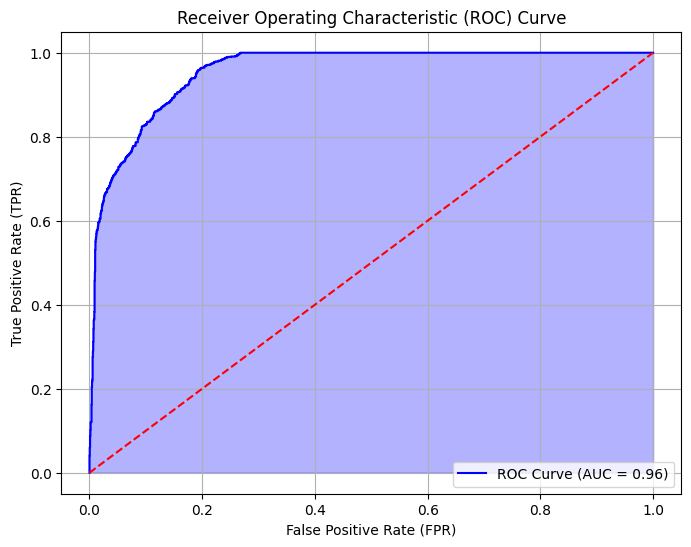

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, catboost_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.fill_between(fpr, tpr, color='blue', alpha=0.3)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [26]:
catboost_model.save_model('catboost_model.cbm')

**Test**

In [27]:
test_df = pd.read_csv('/content/Assignment_Test.csv')

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

In [29]:
columns_to_drop = ['DEALER ID','HDB BRANCH NAME', 'APPLICATION LOGIN DATE', 'HDB BRANCH STATE', 'mobile', 'AADHAR VERIFIED', 'MOBILE VERIFICATION', 'DEALER NAME', 'ASSET MODEL NO', 'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'Personal Email Address', 'DOB', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'vpa', 'upi_name', 'Phone Social Premium.a23games', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart', 'Phone Social Premium.microsoft', 'Phone Social Premium.my11', 'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle', 'Phone Social Premium.shaadi', 'Phone Social Premium.skype', 'Phone Social Premium.toi', 'Phone Social Premium.whatsapp', 'Phone Social Premium.yatra', 'Phone Social Premium.zoho']
test_df.drop(columns=columns_to_drop, inplace=True)

In [30]:
# branch_name_freq = test_df['HDB BRANCH NAME'].value_counts()
# branch_name_freq = branch_name_freq / len(df)
# test_df['HDB BRANCH NAME'] = test_df['HDB BRANCH NAME'].map(branch_name_freq).fillna(0)

In [31]:
test_df['Cibil Score'] = pd.to_numeric(test_df['Cibil Score'], errors='coerce')

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [33]:
le.fit(test_df['MARITAL STATUS'].dropna())

print(dict(zip(le.classes_, le.transform(le.classes_))))

test_df['MARITAL STATUS'] = test_df['MARITAL STATUS'].apply(lambda x: le.transform([x])[0] if pd.notnull(x) else np.nan)

print(test_df['MARITAL STATUS'].unique())

{'Married': 0, 'Single': 1}
[ 0.  1. nan]


In [34]:
le_gender = LabelEncoder()

test_df['GENDER'] = le_gender.fit_transform(test_df['GENDER'])


In [35]:
test_df = pd.get_dummies(test_df, columns=['ADDRESS TYPE'], dummy_na=True)

In [36]:
test_df['EMPLOY CONSTITUTION'] = test_df['EMPLOY CONSTITUTION'].map({
    'SALARIED': 0,
    'SELF-EMPLOYED': 1
})

In [37]:
test_df['pan_name_match'] = test_df.apply(
    lambda row: 1 if pd.isna(row['Pan Name']) or row['Pan Name'] == row['name'] else 0,
    axis=1
)

test_df = test_df.drop(columns=['Pan Name', 'name'])

In [38]:
phone_footprint_encoded = pd.get_dummies(test_df['phone_phoneFootprintStrengthOverall'], dummy_na=True, prefix='phone_footprint')
test_df = pd.concat([test_df, phone_footprint_encoded], axis=1)
test_df = test_df.drop(columns=['phone_phoneFootprintStrengthOverall'])

In [39]:
test_df.drop('ASSET CTG', axis=1, inplace=True)

In [40]:
test_df.drop('UID', axis=1, inplace=True)

In [41]:
test_df.drop('phone_footprint_nan', axis=1, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cibil Score                      5665 non-null   float64
 1   TOTAL ASSET COST                 4892 non-null   float64
 2   APPLIED AMOUNT                   10000 non-null  int64  
 3   MARITAL STATUS                   5106 non-null   float64
 4   GENDER                           10000 non-null  int64  
 5   AGE                              10000 non-null  int64  
 6   EMPLOY CONSTITUTION              5002 non-null   float64
 7   Phone Social Premium.housing     8224 non-null   float64
 8   phone_digitalage                 9996 non-null   float64
 9   phone_nameMatchScore             9996 non-null   float64
 10  Application Status               10000 non-null  int64  
 11  ADDRESS TYPE_Company Provided    10000 non-null  bool   
 12  ADDRESS TYPE_OWNDED

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cibil Score                     1154 non-null   float64
 1   TOTAL ASSET COST                978 non-null    float64
 2   APPLIED AMOUNT                  2000 non-null   int64  
 3   MARITAL STATUS                  1019 non-null   float64
 4   GENDER                          2000 non-null   int64  
 5   AGE                             2000 non-null   int64  
 6   EMPLOY CONSTITUTION             1006 non-null   float64
 7   Phone Social Premium.housing    1977 non-null   float64
 8   phone_digitalage                2000 non-null   int64  
 9   phone_nameMatchScore            2000 non-null   float64
 10  ADDRESS TYPE_Company Provided   2000 non-null   bool   
 11  ADDRESS TYPE_OTHERS             2000 non-null   bool   
 12  ADDRESS TYPE_OWNED-PENTHOUSE    20

In [44]:
new_columns = {
    'ADDRESS TYPE_OWNDED-FLAT': False,
    'ADDRESS TYPE_OWNED-BUNGLOW': False,
    'ADDRESS TYPE_OWNED-ROWHOUSE': False,
    'ADDRESS TYPE_PARENT OWNED-FLAT': False,
    'ADDRESS TYPE_PARENT OWNED-HOUSE': False,
    'ADDRESS TYPE_RENTED-ROWHOUSE': False,
}

for col, default_value in new_columns.items():
    if col not in test_df.columns:
        test_df[col] = default_value

In [45]:
test_dfdf = pd.read_csv('/content/Assignment_Test.csv')
test_dfdf['ADDRESS TYPE'].unique()

array(['Self/Spouse Owned', 'Parental', nan, 'RESIDENCE', 'Rented',
       'OWNED-PENTHOUSE', 'Company Provided', 'OTHERS'], dtype=object)

In [46]:
dfdf = pd.read_csv('/content/Assignment_Train.csv')
dfdf['ADDRESS TYPE'].unique()

array(['Parental', nan, 'Self/Spouse Owned', 'Rented', 'RESIDENCE',
       'PARENT OWNED-HOUSE', 'OWNED-PENTHOUSE', 'Company Provided',
       'OWNDED-FLAT', 'OWNED-BUNGLOW', 'OWNED-ROWHOUSE',
       'PARENT OWNED-FLAT', 'RENTED-ROWHOUSE'], dtype=object)

In [47]:
test_df = test_df.drop('ADDRESS TYPE_OTHERS', axis=1)

In [48]:
catboost_predictions = catboost_model.predict(test_df)

In [49]:
print(len(catboost_predictions))

2000


In [50]:
test_df = pd.read_csv('/content/Assignment_Test.csv')
res_df = test_df[['UID']]
res_df['Prediction'] = catboost_predictions

<ipython-input-50-eb96e590fe0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['Prediction'] = catboost_predictions


In [51]:
res_df['Prediction'] = res_df['Prediction'].replace({0: 'DECLINED', 1: 'APPROVED'})

<ipython-input-51-5237f8f79082>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['Prediction'] = res_df['Prediction'].replace({0: 'DECLINED', 1: 'APPROVED'})


In [53]:
res_df.to_csv('predictions.csv', index=False)